In [20]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [21]:
#reading the data
loan_df = pd.read_csv("loan.csv")

In [22]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [23]:
loan_df.shape

(39717, 111)

In [24]:
loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

#### There are a lot of columns with all null values. These will not contribute to the analysis. So we can remove them

In [25]:
loan_df.dropna(axis = 1, how = 'all', inplace = True)
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [26]:
loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [27]:
column_unique = loan_df.nunique()
print(column_unique)

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26526
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [28]:
c1 = column_unique[column_unique.values == 1]
c1.index

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

### There are several columns which are single valued. 
- They cannot contribute to our analysis in any way. So removing them.

In [29]:
loan_df.drop(columns = list(c1.index), inplace=True)
loan_df.shape

(39717, 48)

#### check for columns with more than 10000 null values 

In [30]:
cols = loan_df.isnull().sum()
c.loc[(c.values > 10000) & (c.values < 39717)].sort_values()


desc                      12942
mths_since_last_delinq    25682
mths_since_last_record    36931
next_pymnt_d              38577
dtype: int64

#### remove these columns as they wont be right for analysis.

In [31]:
loan_df.drop(columns=list(c[c.values > 10000].index), inplace=True)
loan_df.shape

(39717, 44)

### Now we have 44 columns out of which some correspond to the post approval of loan
The company aims to identify risky loan applications. Consequently, fields created after loan approval are irrelevant for our business objective. Additionally, fields like id, member_id, and url are unique to each application and zip_code, though potentially useful, contains partial data that could negatively impact our analysis. Therefore, we will drop the following columns:

In [32]:
del_cols = ["id","member_id","url","zip_code","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv",
            "total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee",
            "last_pymnt_d","last_pymnt_amnt","last_credit_pull_d"]
loan_df.drop(columns=del_cols, inplace=True)

In [33]:
loan_df.shape

(39717, 28)

In [34]:
loan_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'pub_rec_bankruptcies'],
      dtype='object')

In [35]:
loan_df['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

### Since loan status "Current" doesnt give any info for our analysis for approving or rejecting application, so dropping this data makes sense

In [36]:
loan_df = loan_df[loan_df.loan_status != "Current"]
loan_df.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

### We will now look for some key columns in the data and see the values

In [37]:
loan_df['term'].value_counts()

term
 36 months    29096
 60 months     9481
Name: count, dtype: int64

In [38]:
# lets check the interest rate column

loan_df['int_rate'].head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
5     7.90%
Name: int_rate, dtype: object

In [39]:
#Let's remvoe %
loan_df['int_rate'] = loan_df['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))
loan_df['int_rate'].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

### Checking for missing values

In [40]:
(loan_df.isna().sum()/len(loan_df.index))*100

loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               6.185033
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.028514
addr_state              0.000000
dti                     0.000000
delinq_2yrs             0.000000
earliest_cr_line        0.000000
inq_last_6mths          0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.129611
total_acc               0.000000
pub_rec_bankruptcies    1.806776
dtype: float64

## Handling Missing values
 - columns with missing values are "emp_length", "revol_util", "pub_rec_bankruptcies", "title" 
 - So before doing that, lets see what kind of data each column has. 

In [42]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  object 
 4   int_rate              38577 non-null  float64
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_title             36191 non-null  object 
 9   emp_length            37544 non-null  object 
 10  home_ownership        38577 non-null  object 
 11  annual_inc            38577 non-null  float64
 12  verification_status   38577 non-null  object 
 13  issue_d               38577 non-null  object 
 14  loan_status           38577 non-null  object 
 15  purpose               38

In [43]:
print("Mode : " + loan_df.emp_length.mode()[0])
loan_df.emp_length.value_counts()

Mode : 10+ years


emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

### The above value counts shows that the mode value has far higher frequency than that of the next most frequent value. 
- This means that we can safely assign the value of mode to the null values in the column.
- Also the missing values are in very low percentage. So imputung with mode value doesnt affect the analysis much.

In [44]:
loan_df.emp_length.fillna(loan_df.emp_length.mode()[0], inplace = True)
loan_df.emp_length.isna().sum()

0

In [45]:
loan_df.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
loan_df.revol_util.isna().sum()

0

In [48]:
print(loan_df.pub_rec_bankruptcies.mode()[0])
loan_df.pub_rec_bankruptcies.value_counts()
loan_df.pub_rec_bankruptcies.fillna(loan_df.pub_rec_bankruptcies.mode()[0], inplace = True)
loan_df.pub_rec_bankruptcies.isna().sum()

0.0


0

## Reformat the data 
Now we will analyse more columns in the data set and see if we can set better data types, reformat the data to a more analytics friendly data type.

In [49]:
loan_df.revol_util.head()

0    83.70%
1     9.40%
2    98.50%
3       21%
5    28.30%
Name: revol_util, dtype: object

In [50]:
# remove the % symbol from data.
loan_df.revol_util = pd.to_numeric(loan_df.revol_util.apply(lambda x : x.split('%')[0]))

In [52]:
loan_df.emp_length.head()

0    10+ years
1     < 1 year
2    10+ years
3    10+ years
5      3 years
Name: emp_length, dtype: object

In [53]:
loan_df.emp_length = pd.to_numeric(loan_df.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [54]:
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10,...,27.65,0,Jan-85,1,3,0,13648,83.7,9,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,0,...,1.00,0,Apr-99,5,3,0,1687,9.4,4,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10,...,8.72,0,Nov-01,2,2,0,2956,98.5,10,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,...,20.00,0,Feb-96,1,10,0,5598,21.0,37,0.0
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3,...,11.20,0,Nov-04,3,9,0,7963,28.3,12,0.0


## Outlier Treatment

<Axes: >

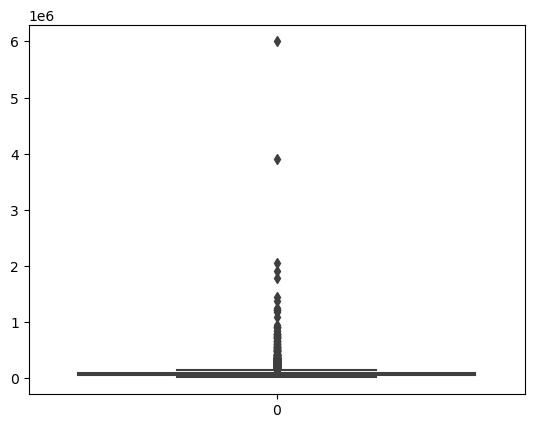

In [55]:
sns.boxplot(loan_df['annual_inc'])

#### Clearly indincating the presence of outliers.
- So, Removing them.
- Let's see the quantile info and take an appropriate action.
- The values after 95 percentile seems to be disconected from the general distribution and also there is huge increase in the value for small quantile variation.
- So, considering threshold for removing outliers as 0.95

In [56]:
quantile_info = loan_df.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234000.0
Name: annual_inc, dtype: float64

In [57]:
per_95_annual_inc = loan_df['annual_inc'].quantile(0.95)
loan_df = loan_df[loan_df.annual_inc <= per_95_annual_inc]

<Axes: >

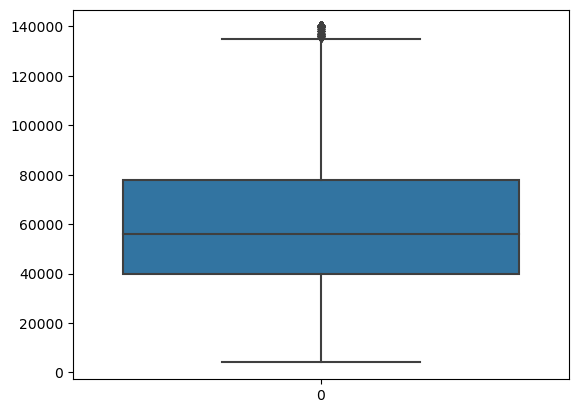

In [58]:
sns.boxplot(loan_df.annual_inc)

##### Now the "annual_inc" data looks good and proceeding next.
- Let's analyze other numerical variables which could possibly have outliers.
    - dti
    - loan_amnt
    - funded_amnt_inv 

<Axes: >

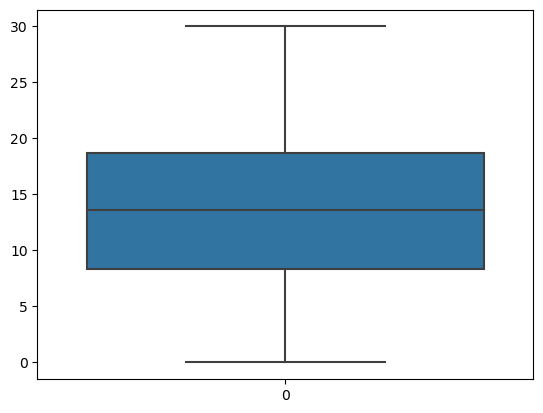

In [59]:
sns.boxplot(loan_df.dti)

<Axes: >

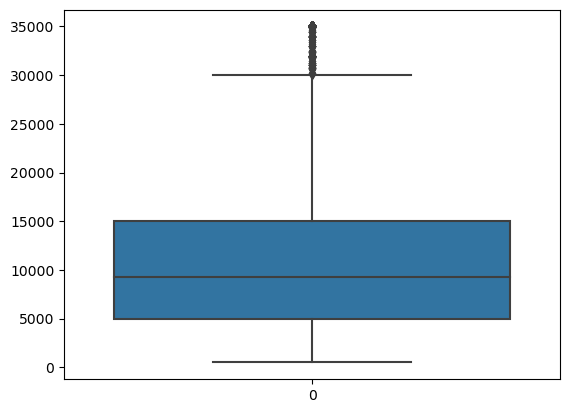

In [60]:
sns.boxplot(loan_df.loan_amnt)

In [61]:
loan_df.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    15000.0
0.900    20000.0
0.950    25000.0
0.970    25475.0
0.975    28000.0
0.980    30000.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

<Axes: >

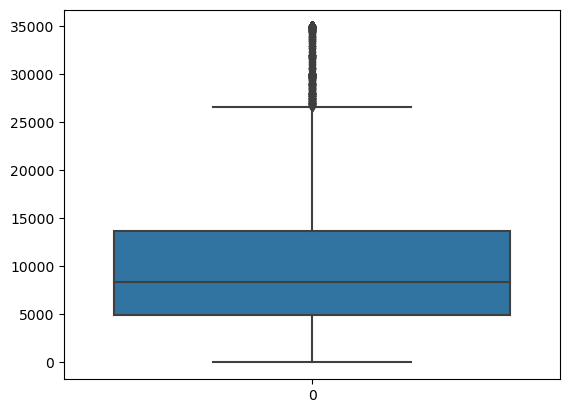

In [62]:
sns.boxplot(loan_df.funded_amnt_inv)

In [63]:
loan_df.funded_amnt_inv.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99, 1.0])

0.500     8396.342174
0.750    13649.999283
0.900    19750.000000
0.950    23949.287805
0.970    24975.000000
0.975    25350.000000
0.980    27953.287538
0.985    29925.000000
0.990    31966.803281
1.000    35000.000000
Name: funded_amnt_inv, dtype: float64

- Though there are some values far from distribution, the distribution is pretty continousand there is no need to remove outliers / extreme values for these above columns.

## Analysing Data based on Categories
#### As we already have grade column, extracting only subgrade (int level value) from the sub_grade variable
- We are interesed mostly in the defaulter data. So subsetting the data while plotting only for 'Charged Off' loan_status for below plots


<Axes: xlabel='loan_status', ylabel='count'>

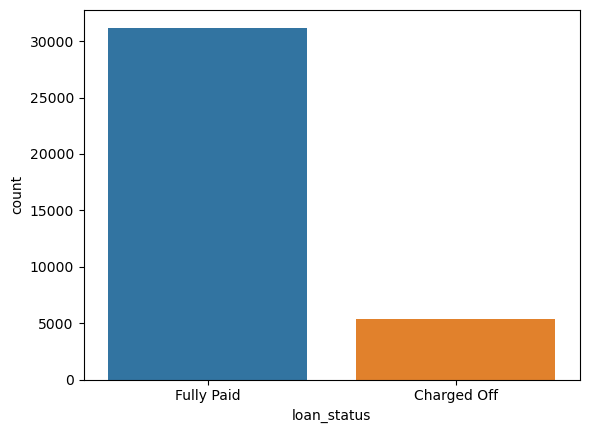

In [64]:
sns.countplot(x = 'loan_status', data = loan_df)

In [65]:
loan_df.sub_grade = pd.to_numeric(loan_df.sub_grade.apply(lambda x : x[-1]))
loan_df.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

<Axes: xlabel='grade', ylabel='count'>

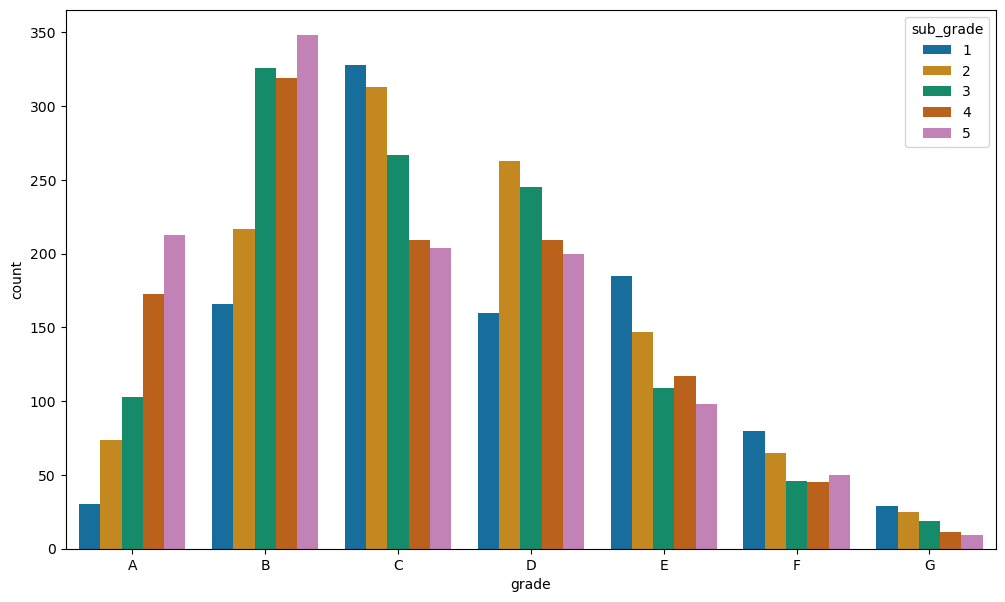

In [66]:
fig, ax = plt.subplots(figsize=(12,7))
sns.set_palette('colorblind')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan_df[loan_df.loan_status == 'Charged Off'])

<Axes: xlabel='grade', ylabel='count'>

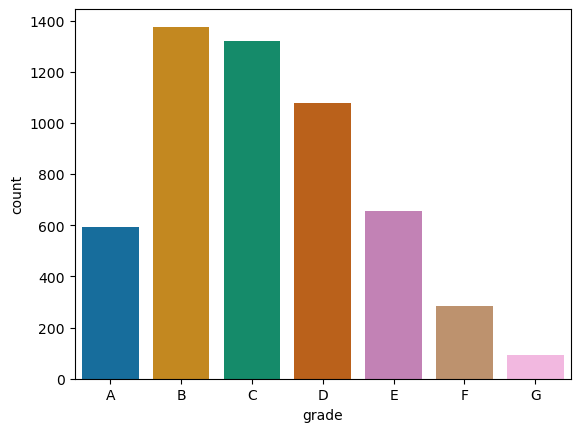

In [67]:
sns.countplot(x = 'grade', data = loan_df[loan_df.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

####  Analyzing home_ownership

In [68]:
#checking unique values for home_ownership
loan_df['home_ownership'].unique()


array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

#### There are only 3 records with 'NONE' value in the data. So replacing the value with 'OTHER'

In [69]:
#replacing 'NONE' with 'OTHERS'
loan_df['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

In [70]:
#checking unique values for home_ownership again
loan_df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

<Axes: xlabel='home_ownership', ylabel='count'>

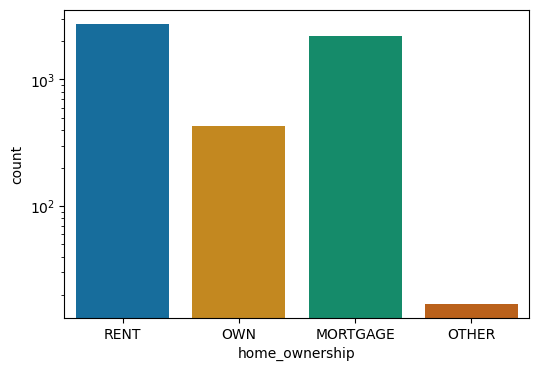

In [71]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=loan_df[loan_df['loan_status']=='Charged Off'])

####  Analyzing purpose

<Axes: xlabel='count', ylabel='purpose'>

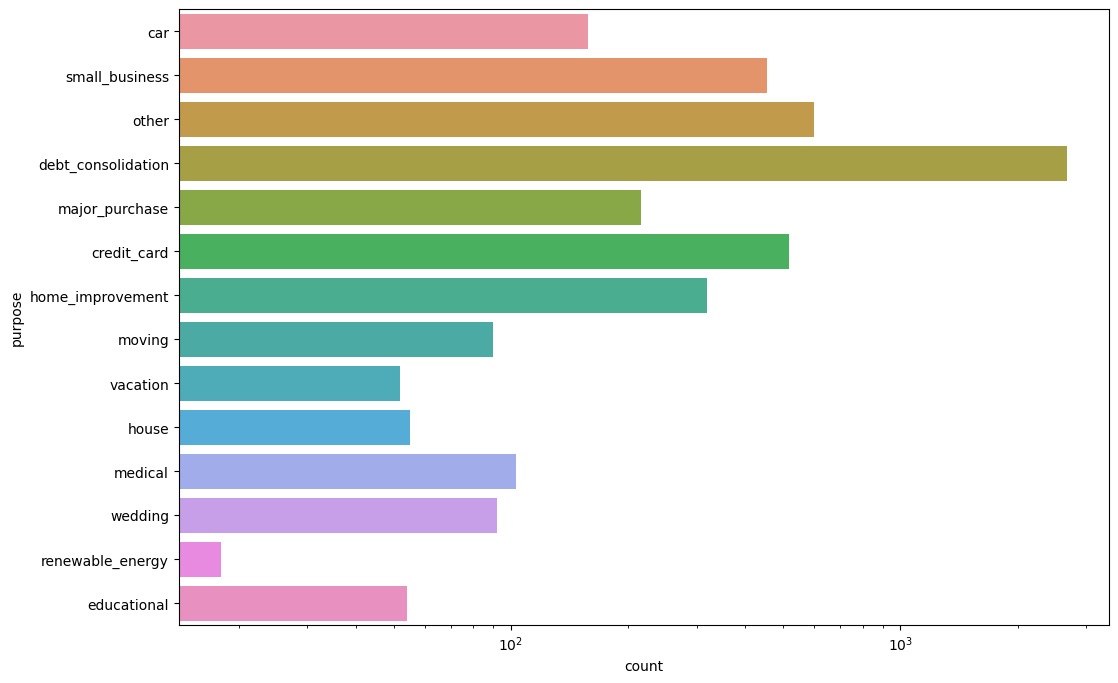

In [72]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=loan_df[loan_df.loan_status == 'Charged Off'])


#### Creating bins for some numerical variable to make them categorical

In [73]:
#creating bins for int_rate,open_acc,revol_util,total_acc
loan_df['int_rate_groups'] = pd.cut(loan_df['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
loan_df['open_acc_groups'] = pd.cut(loan_df['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
loan_df['revol_util_groups'] = pd.cut(loan_df['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
loan_df['total_acc_groups'] = pd.cut(loan_df['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
loan_df['annual_inc_groups'] = pd.cut(loan_df['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

In [74]:
# Viewing new bins created
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups
0,5000,5000,4975.0,36 months,10.65,162.87,B,2,NaN,10,...,0,13648,83.7,9,0.0,9%-13%,2-10,80-100,2-20,3k-31k
1,2500,2500,2500.0,60 months,15.27,59.83,C,4,Ryder,0,...,0,1687,9.4,4,0.0,13%-17%,2-10,0-20,2-20,3k-31k
2,2400,2400,2400.0,36 months,15.96,84.33,C,5,NaN,10,...,0,2956,98.5,10,0.0,13%-17%,2-10,80-100,2-20,3k-31k
3,10000,10000,10000.0,36 months,13.49,339.31,C,1,AIR RESOURCES BOARD,10,...,0,5598,21.0,37,0.0,13%-17%,2-10,20-40,20-37,31k-58k
5,5000,5000,5000.0,36 months,7.90,156.46,A,4,Veolia Transportaton,3,...,0,7963,28.3,12,0.0,5%-9%,2-10,20-40,2-20,31k-58k


#### Analyzing interest rate wrt the interest rate bins created

<Axes: xlabel='emp_length', ylabel='count'>

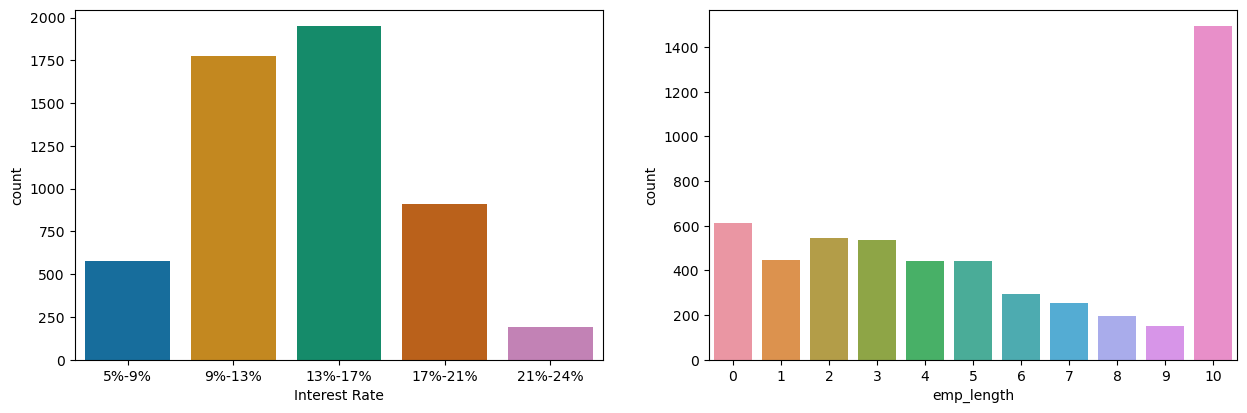

In [75]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='int_rate_groups', data=loan_df[loan_df.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')
plt.subplot(222)
sns.countplot(x='emp_length', data=loan_df[loan_df.loan_status == 'Charged Off'])

#### Similarly analyzing open_acc,revol_util,total_acc,annual_inc

<Axes: xlabel='open_acc_groups', ylabel='count'>

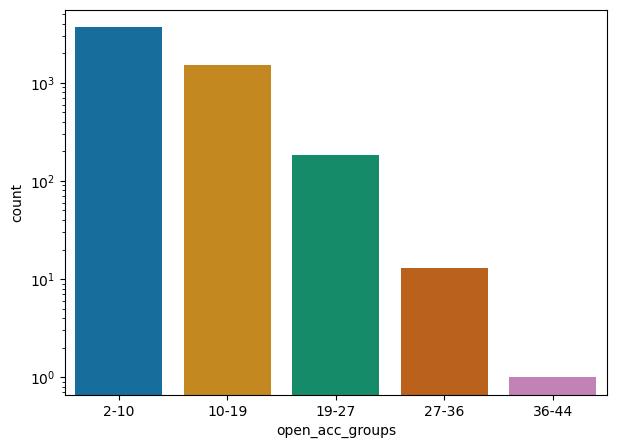

In [76]:
fig, ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='open_acc_groups', data=loan_df[loan_df.loan_status == 'Charged Off'])

<Axes: xlabel='revol_util_groups', ylabel='count'>

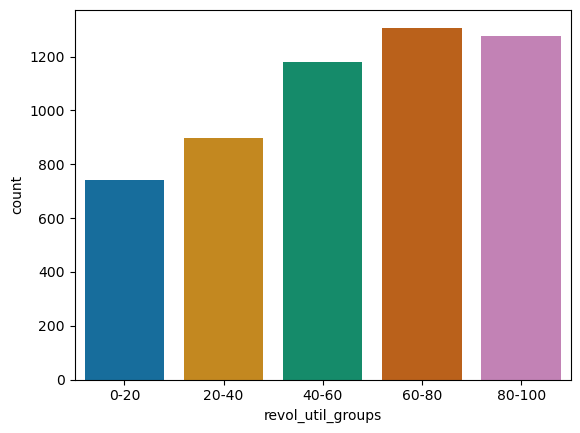

In [77]:
sns.countplot(x='revol_util_groups', data=loan_df[loan_df.loan_status == 'Charged Off'])

<Axes: xlabel='total_acc_groups', ylabel='count'>

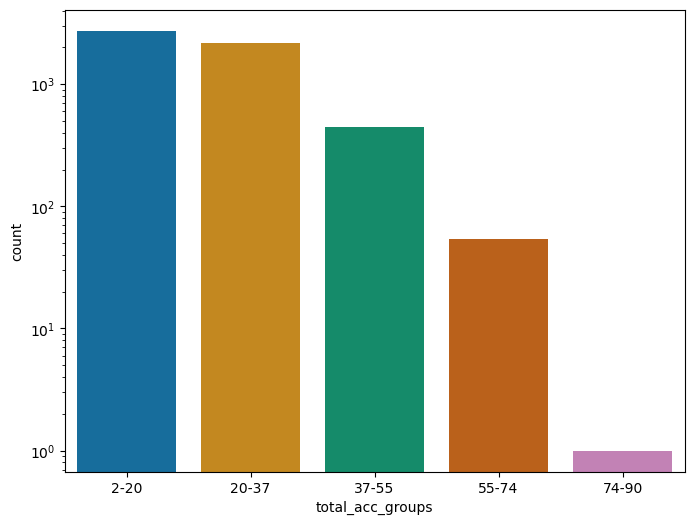

In [78]:
fig, ax = plt.subplots(figsize = (8,6))
ax.set_yscale('log')
sns.countplot(x='total_acc_groups', data=loan_df[loan_df.loan_status == 'Charged Off'])

<Axes: xlabel='annual_inc_groups', ylabel='count'>

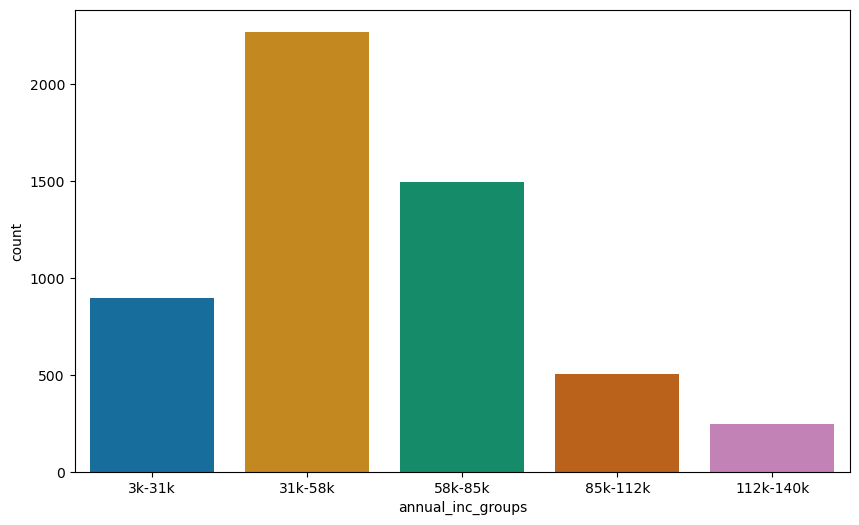

In [80]:
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(x='annual_inc_groups', data=loan_df[loan_df.loan_status == 'Charged Off'])

<Axes: xlabel='count', ylabel='term'>

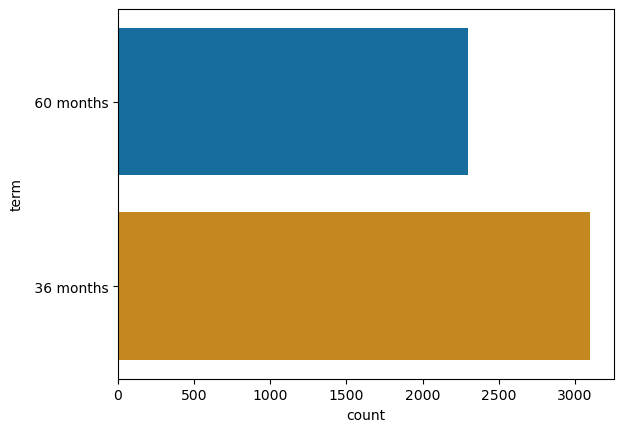

In [81]:
sns.countplot(y='term', data=loan_df[loan_df['loan_status']=='Charged Off'])

<Axes: xlabel='verification_status', ylabel='count'>

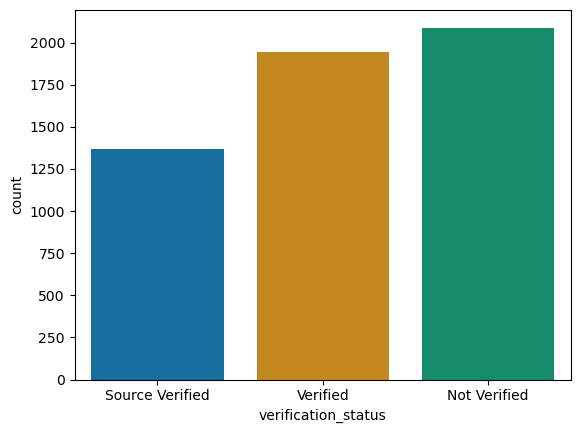

In [82]:
sns.countplot(x='verification_status', data=loan_df[loan_df['loan_status']=='Charged Off'])

<Axes: xlabel='inq_last_6mths', ylabel='count'>

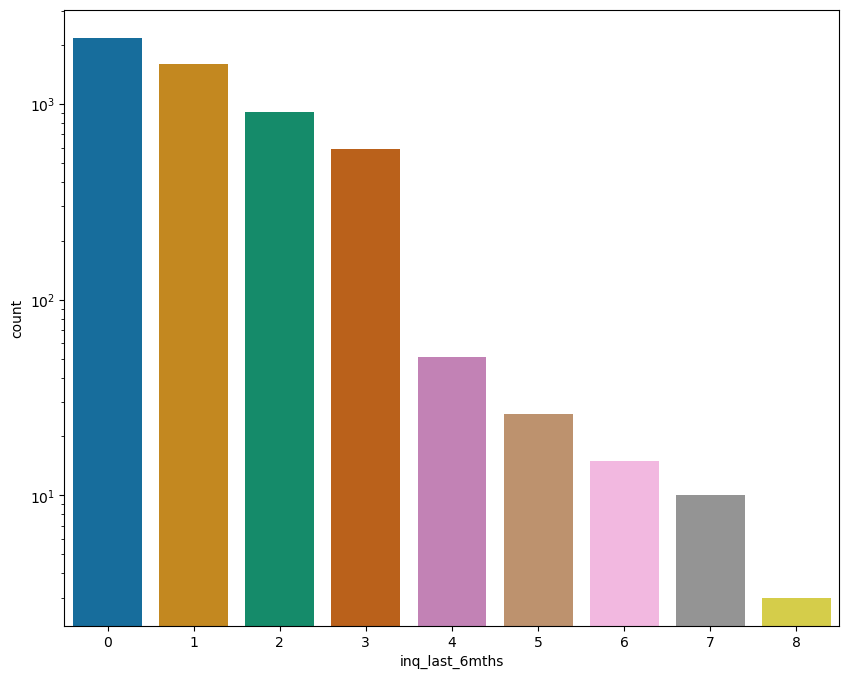

In [83]:
fig,ax = plt.subplots(figsize = (10,8))
ax.set_yscale('log')
sns.countplot(x='inq_last_6mths', data=loan_df[loan_df['loan_status']=='Charged Off'])

<Axes: xlabel='pub_rec', ylabel='count'>

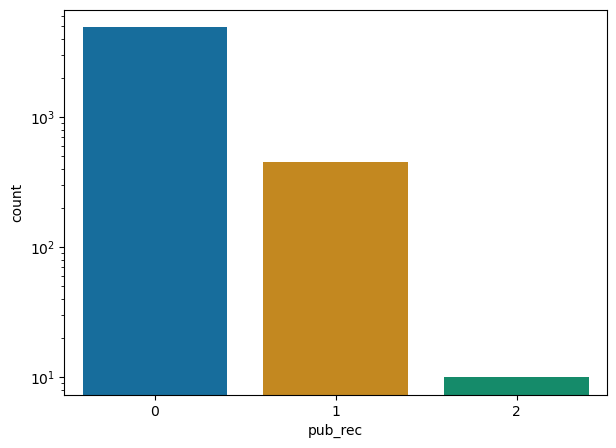

In [84]:
fig,ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='pub_rec', data=loan_df[loan_df['loan_status']=='Charged Off'])

### Analyzing by issued month and year


In [85]:
## Extracting month and year
df_month_year = loan_df['issue_d'].str.partition("-", True)     
loan_df['issue_month']=df_month_year[0]                       
loan_df['issue_year']='20' + df_month_year[2]

In [86]:
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,revol_util,total_acc,pub_rec_bankruptcies,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups,issue_month,issue_year
0,5000,5000,4975.0,36 months,10.65,162.87,B,2,NaN,10,...,83.7,9,0.0,9%-13%,2-10,80-100,2-20,3k-31k,Dec,2011
1,2500,2500,2500.0,60 months,15.27,59.83,C,4,Ryder,0,...,9.4,4,0.0,13%-17%,2-10,0-20,2-20,3k-31k,Dec,2011
2,2400,2400,2400.0,36 months,15.96,84.33,C,5,NaN,10,...,98.5,10,0.0,13%-17%,2-10,80-100,2-20,3k-31k,Dec,2011
3,10000,10000,10000.0,36 months,13.49,339.31,C,1,AIR RESOURCES BOARD,10,...,21.0,37,0.0,13%-17%,2-10,20-40,20-37,31k-58k,Dec,2011
5,5000,5000,5000.0,36 months,7.90,156.46,A,4,Veolia Transportaton,3,...,28.3,12,0.0,5%-9%,2-10,20-40,2-20,31k-58k,Dec,2011


<Axes: xlabel='issue_year', ylabel='count'>

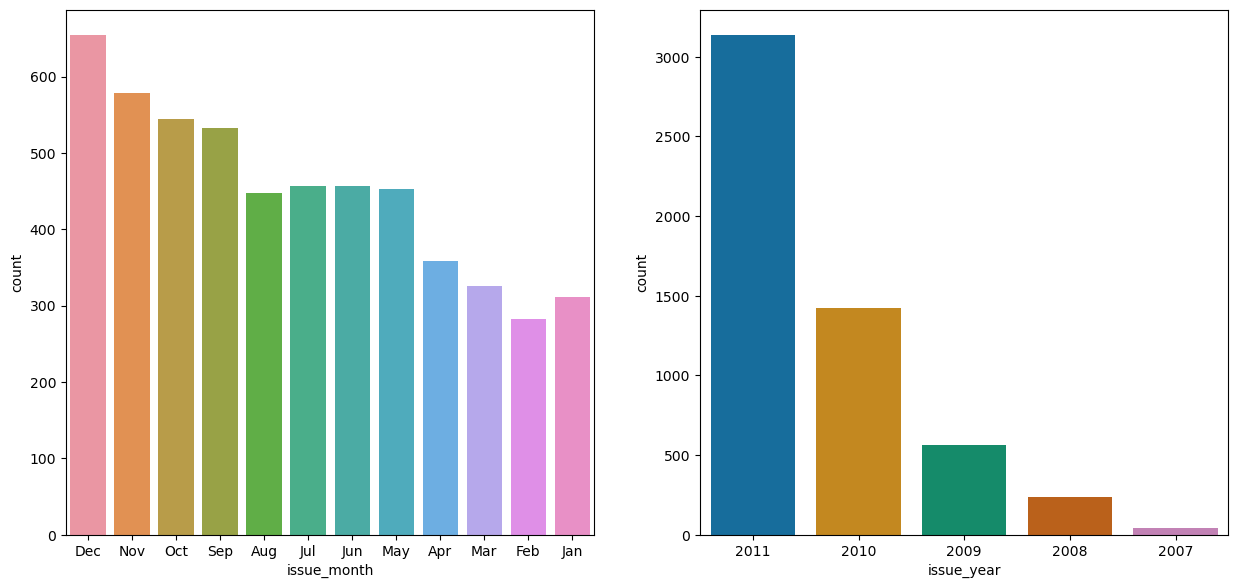

In [87]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='issue_month', data=loan_df[loan_df['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='issue_year', data=loan_df[loan_df['loan_status']=='Charged Off'])

### Maximum number of defaults occured when the loan was sanctioned/issued in Dec. Loan issued in the year 2011 were also as compared to other years

### Analyzing installment,dti, loan_amnt 


In [88]:
loan_df['installment_groups'] = pd.cut(loan_df['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
loan_df['funded_amnt_inv_group'] = pd.cut(loan_df['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) ## bin is starting from -35?
loan_df['loan_amnt_groups'] = pd.cut(loan_df['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan_df['dti_groups'] = pd.cut(loan_df['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

<Axes: xlabel='funded_amnt_inv_group', ylabel='count'>

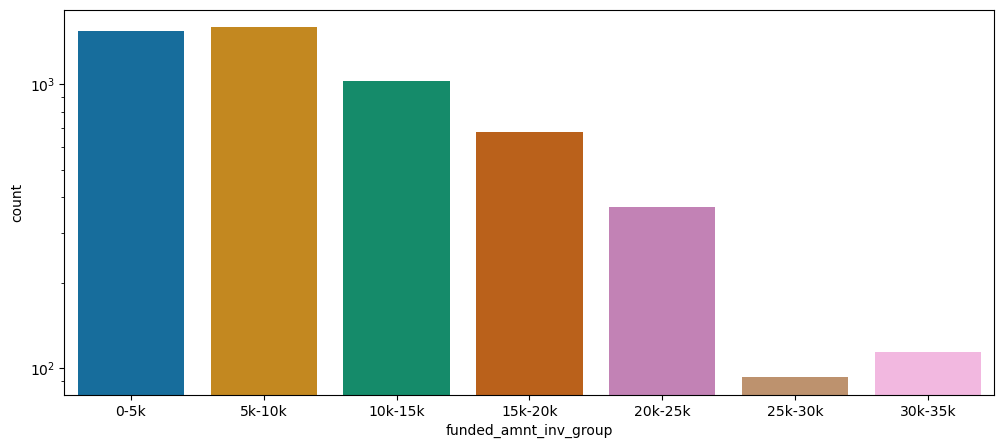

In [89]:
fig,ax = plt.subplots(figsize = (12,5))
ax.set_yscale('log')
sns.countplot(x='funded_amnt_inv_group', data=loan_df[loan_df['loan_status']=='Charged Off'])

<Axes: xlabel='loan_amnt_groups', ylabel='count'>

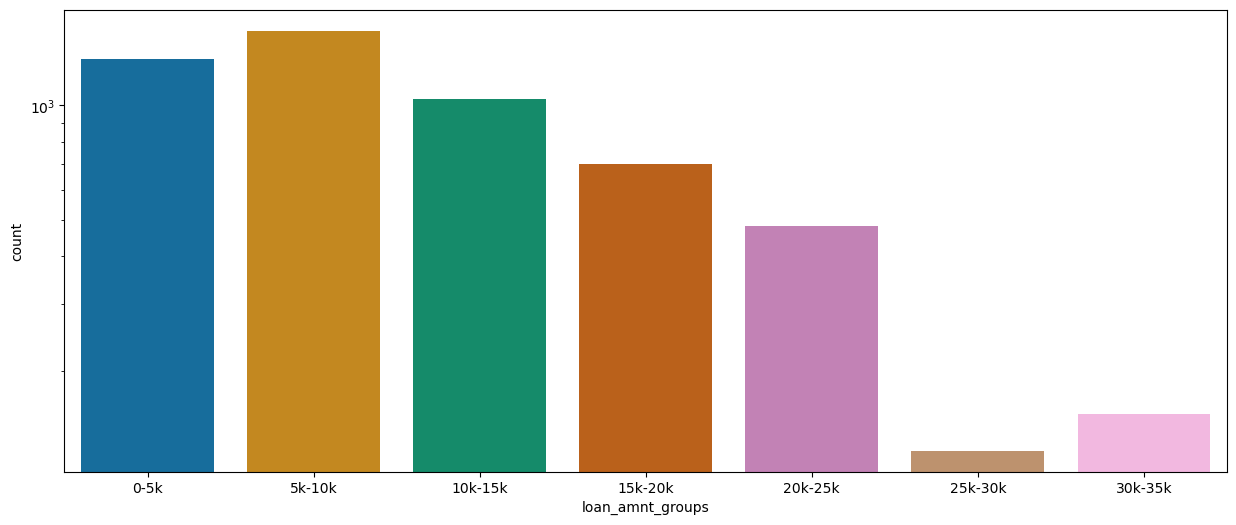

In [90]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='loan_amnt_groups', data=loan_df[loan_df['loan_status']=='Charged Off'])

<Axes: xlabel='dti_groups', ylabel='count'>

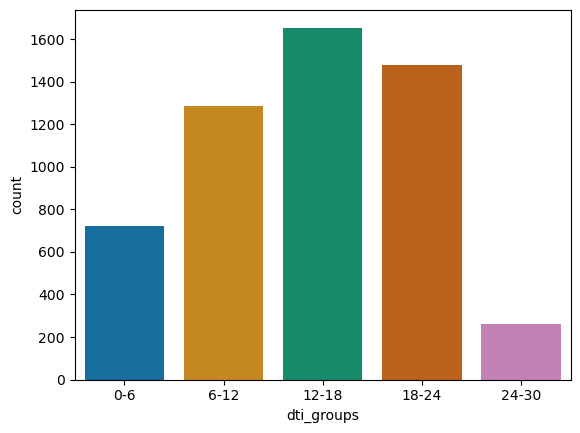

In [91]:
sns.countplot(x='dti_groups', data=loan_df[loan_df['loan_status']=='Charged Off'])

<Axes: xlabel='installment_groups', ylabel='count'>

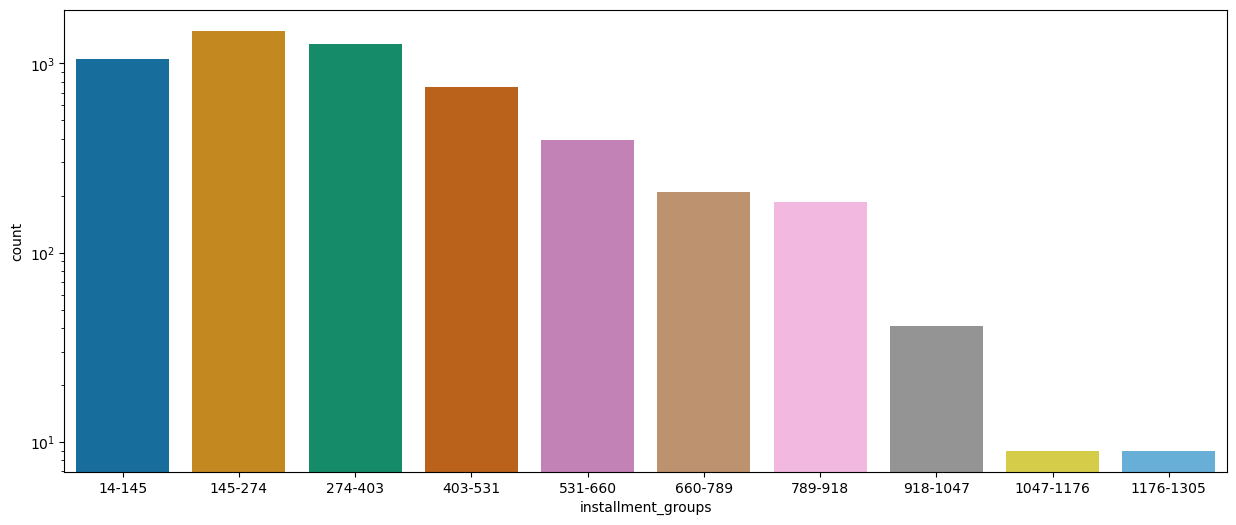

In [92]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='installment_groups', data=loan_df[loan_df['loan_status']=='Charged Off'])

# Key observations from the data above

### The above analysis of charged-off loans indicates higher default probability when:

-   Applicants have house ownership status as 'RENT'
-   Loans are used to clear other debts
-   Interest rates are between 13-17%
-   Annual income ranges from 31,201 to 58,402
-   Applicants have 20-37 open accounts
-   Employment length is 10 years
-   Funded amount by investors is between 5,000-10,000
-   Loan amount ranges from 5,429 to 10,357
-   Debt-to-income ratio (DTI) is between 12-18
-   Monthly installments are between 145-274
-   Loan term is 36 months
-   Loan status is 'Not verified'
-   No inquiries in the last 6 months
-   No derogatory public records
-   Loan purpose is 'debt_consolidation'
-   Grade is 'B'
-   Subgrade is 'B5'

- If the Loan was issued in Month of december or year 2011

## Analysing annual income with other columns for more insights 

### Annual Income vs Loan amount

<Axes: xlabel='annual_inc_groups', ylabel='loan_amnt'>

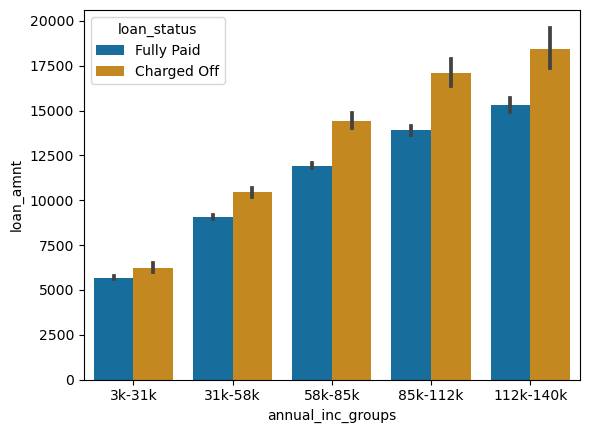

In [96]:
sns.barplot(x = "annual_inc_groups", y = "loan_amnt", hue = 'loan_status', data = loan_df)

### Across all the income groups, the loan_amount is higher for people who defaulted.

#### 3. Annual income vs int_rate

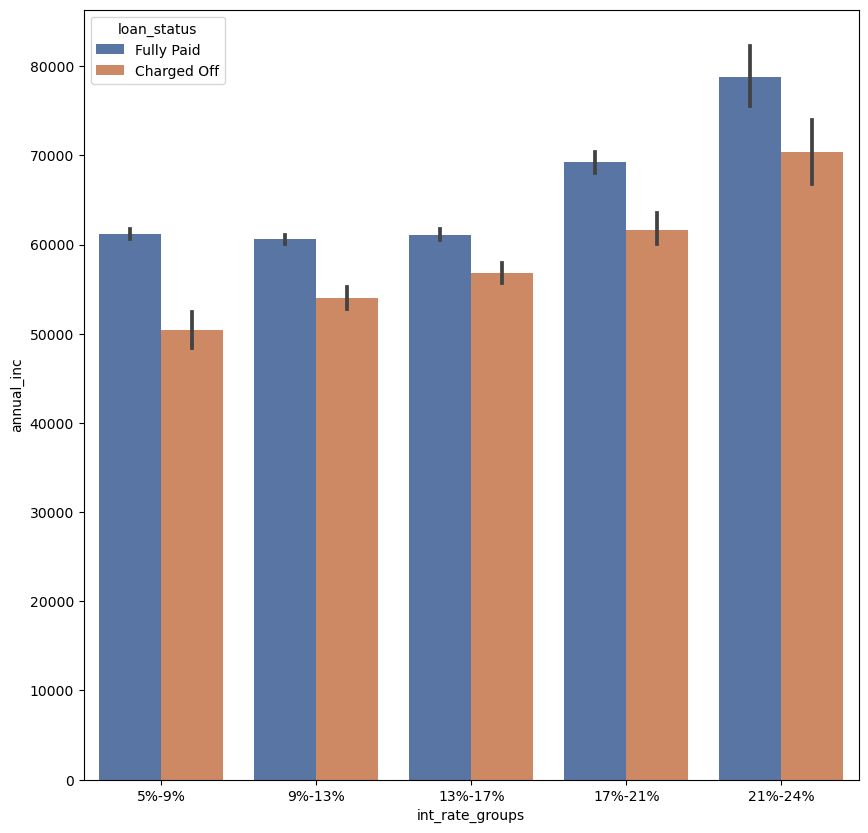

In [98]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_df,x='int_rate_groups', y='annual_inc', hue ='loan_status',palette="deep")
plt.show()

## Analysing loan_amount with other columns for more insights 

#### 1.Loan Amount vs Interest Rate

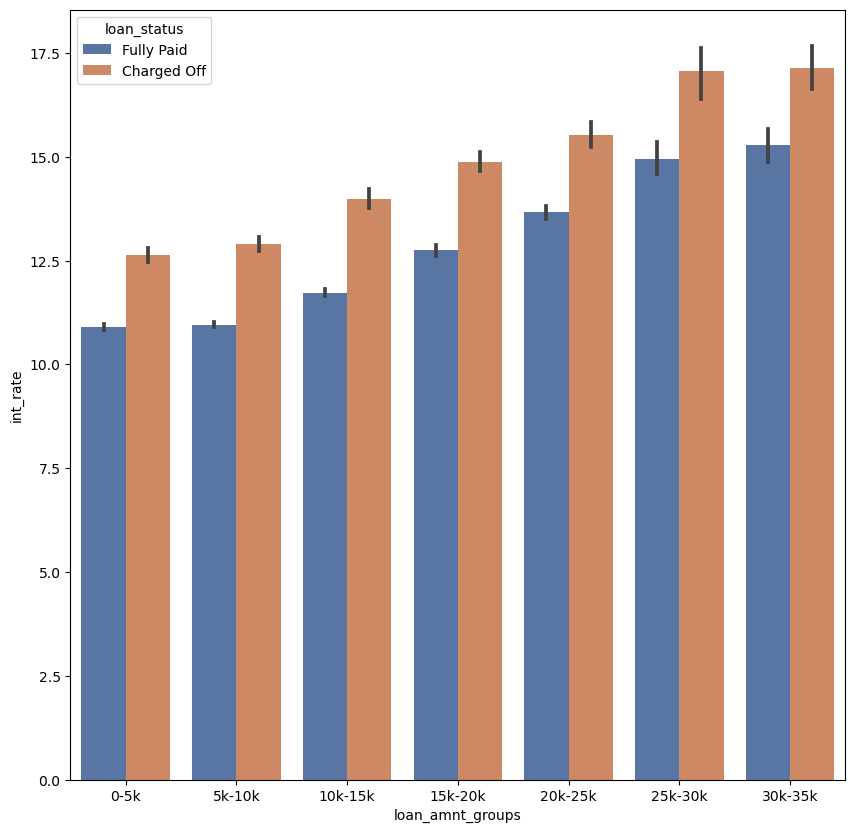

In [100]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_df,x='loan_amnt_groups', y='int_rate', hue ='loan_status',palette="deep")
plt.show()

#### 2.Loan vs Loan purpose

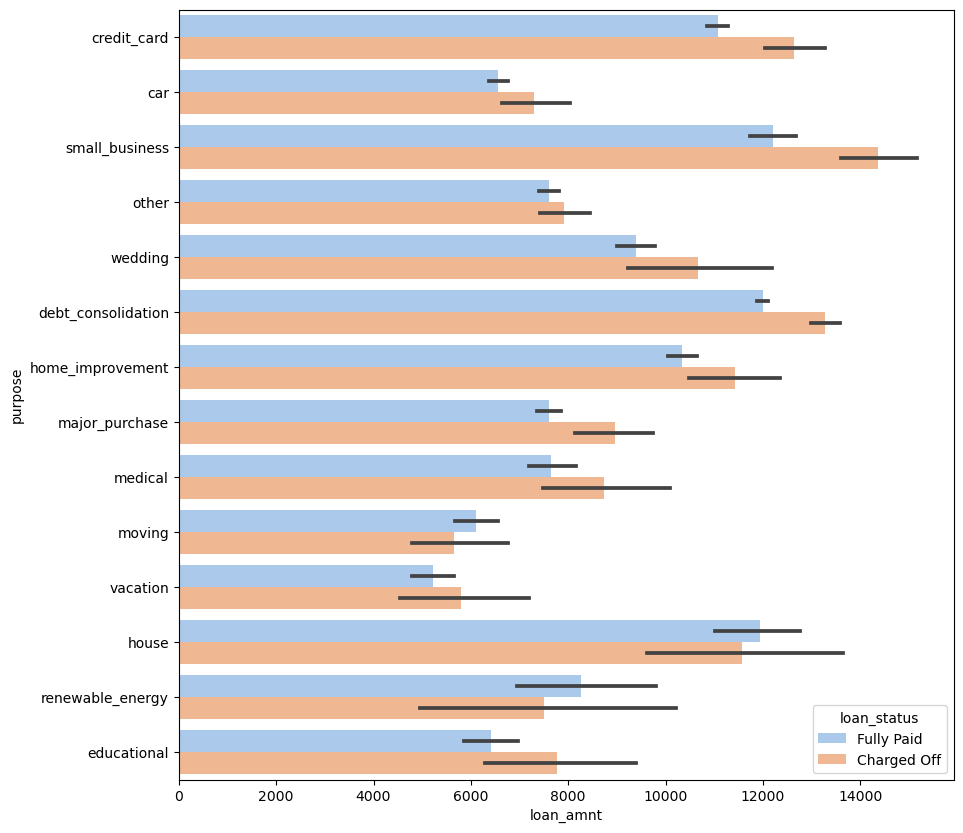

In [101]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_df,x='loan_amnt', y='purpose', hue ='loan_status',palette="pastel")
plt.show()

#### 3.Loan amount vs Grade

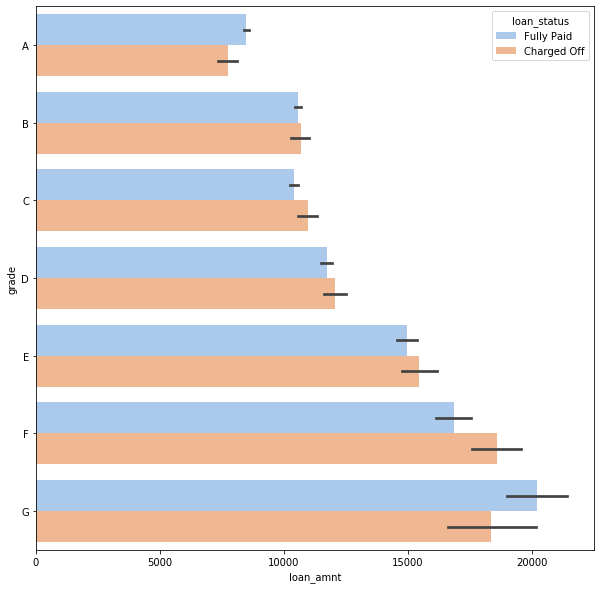

In [66]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_df,x='loan_amnt', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

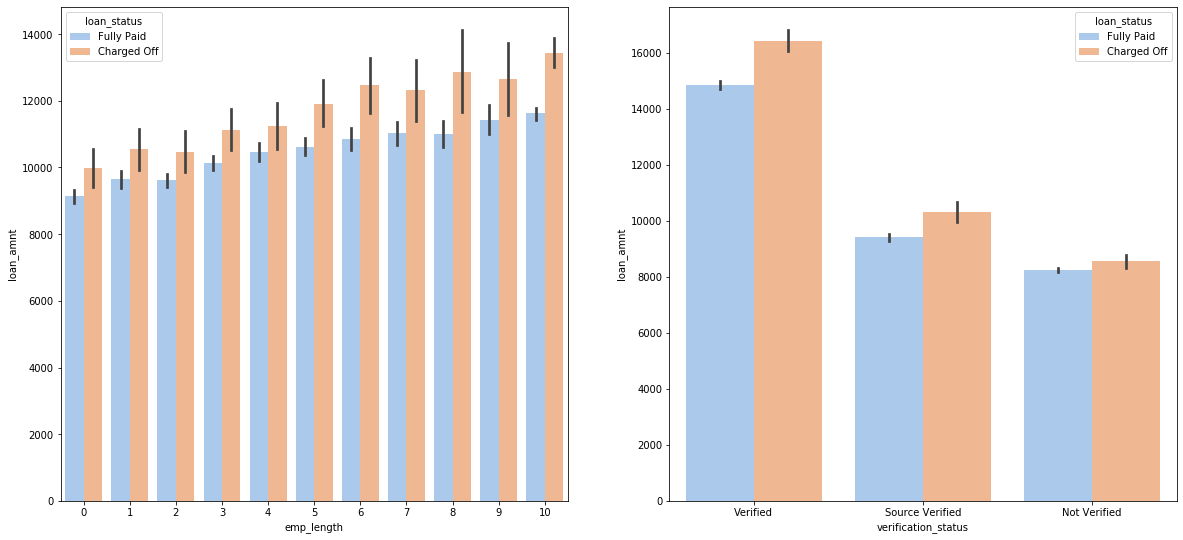

In [67]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.barplot(data =loan_df,y='loan_amnt', x='emp_length', hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.barplot(data =loan_df,y='loan_amnt', x='verification_status', hue ='loan_status',palette="pastel")


### Employees with longer working history got the loan approved for a higher amount. 
- Looking at the verification status data, verified loan applications tend to have higher loan amount. Which might indicate that the firms are first verifying the loans with higher values.

#### grade vs interest rate

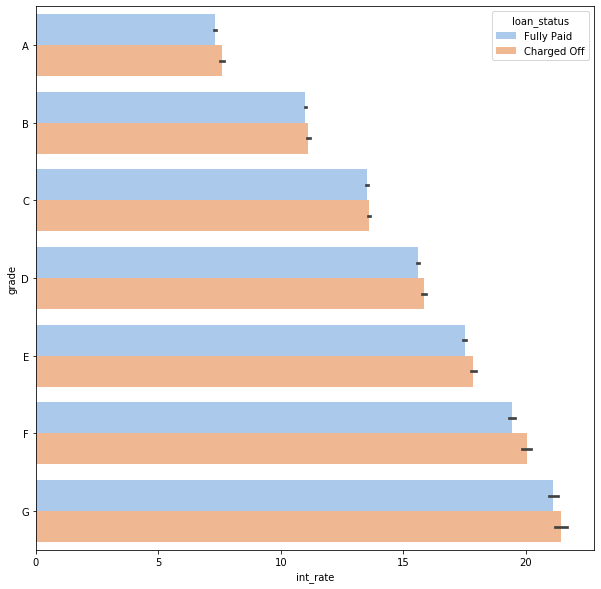

In [68]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_df,x='int_rate', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

<Figure size 640x480 with 0 Axes>

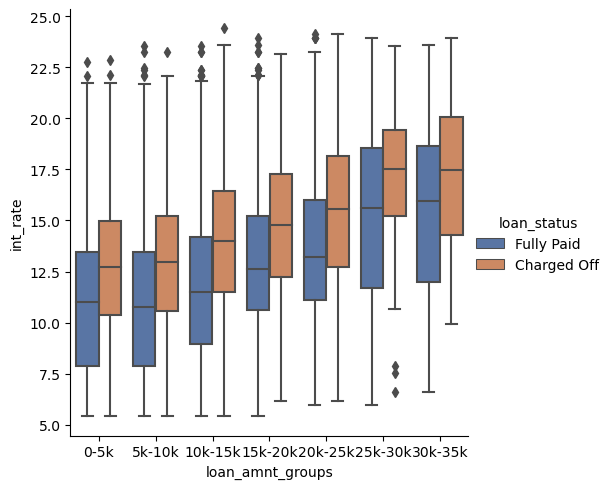

In [102]:
# fig,ax = plt.subplots(figsize = (15,6))
plt.tight_layout()
sns.catplot(data =loan_df,y ='int_rate', x ='loan_amnt_groups', hue ='loan_status',palette="deep",kind = 'box')

### The interest rate for charged off loans is pretty high than that of fully paid loans in all the loan_amount groups. 
- This can be a pretty strong driving factor for loan defaulting.

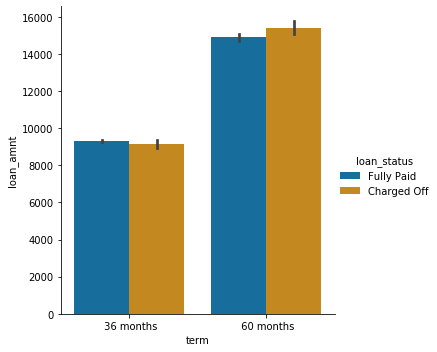

In [71]:
sns.catplot(x = 'term', y = 'loan_amnt', data = loan_df,hue = 'loan_status', kind = 'bar')

# Key Observations

###The above analysis of charged-off loans indicates a higher probability of default when:

    -   Applicants take a loan for 'home improvement' and have an income of 60k-70k
    -   Home ownership is 'MORTGAGE' and income is 60k-70k
    -   Interest rates are 21-24% and income is 70k-80k
    -   Loan amounts are 30k-35k with interest rates of 15-17.5%
    -   Loans are for small businesses and amounts are greater than 14k
    -   Home ownership is 'MORTGAGE' and loan amounts are 14k-16k
    -   Grade is 'F' and loan amounts are between 15k-20k
    -   Employment length is 10 years and loan amounts are 12k-14k
    -   Loans are verified and amounts are above 16k
    -   Grade is 'G' and interest rates are above 20%